Initial setup and first topic model run

In [66]:
%reload_ext autoreload
%autoreload 2

In [67]:
import wosis
import pandas as pd
import metaknowledge as mk
import wosis.analysis.plotting as wos_plot

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# This just helps make the plots look nicer
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2.0)

In [68]:
RC = mk.RecordCollection("tmp/rest_requested_corpora.txt")
corpora_df = wosis.rec_to_df(RC)

In [69]:
hide_columns = ['DE', 'abstract', 'keywords', 'DOI', 'id', 'kws']

<hr> Running topic model on corpora

In [70]:
from wosis.analysis import find_topics
topic_results = find_topics(corpora_df, num_topics=5)

Topic 1: model parameters sensitivity models data analysis parameter flow calibration time
Topic 2: optimization design method shape topology problem sensitivity element structural finite
Topic 3: uncertainty stochastic quantification carlo monte bayesian method uncertainties random polynomial
Topic 4: risk emissions energy assessment environmental exposure production cost health analysis
Topic 5: water soil climate river quality groundwater change management land runoff


In [71]:
# find paper of interest - see if it's still in the corpora
tmp_df = topic_results.corpora_df  
tmp_df.loc[tmp_df.id == 'WOS:000248233200001']

for i in range(topic_results.num_topics):
    topic_id = i + 1
    tmp_topic = topic_results.get_topic_by_id(topic_id)
    print("topic_id", topic_id)
    print(tmp_topic.loc[tmp_topic.id == 'WOS:000248233200001']['id'])

topic_id 1
Series([], Name: id, dtype: object)
topic_id 2
Series([], Name: id, dtype: object)
topic_id 3
2274    WOS:000248233200001
Name: id, dtype: object
topic_id 4
Series([], Name: id, dtype: object)
topic_id 5
Series([], Name: id, dtype: object)


In [72]:
subtopic1 = topic_results.get_topic_by_id(1)
subtopic2 = topic_results.get_topic_by_id(2)
subtopic3 = topic_results.get_topic_by_id(3)

In [73]:
model_param_rc = wosis.extract_recs(subtopic1['id'], RC, name='model_param')
opti_design_rc = wosis.extract_recs(subtopic2['id'], RC, name='opti_design')
uncert_rc = wosis.extract_recs(subtopic3['id'], RC, name='uncert')

In [74]:
from functools import reduce

In [75]:
topics_combined = reduce(lambda x, y: x + y, [model_param_rc, opti_design_rc, uncert_rc])

In [76]:
topics_combined_df = wosis.rc_to_df(topics_combined)
topics_combined_df.to_csv('../data/topics_combined.csv')

In [77]:
topics_combined_results = find_topics(topics_combined_df, num_topics=5)

Topic 1: model sensitivity parameters analysis data flow models parameter soil results
Topic 2: optimization design shape topology method sensitivity structural problem analysis element
Topic 3: uncertainty bayesian uncertainties carlo monte model quantification models analysis data
Topic 4: stochastic random method polynomial chaos quantification expansion equations collocation solution
Topic 5: neural network ann artificial networks fuzzy prediction algorithm models regression


In [78]:
combined_subtopic1 = topics_combined_results.get_topic_by_id(1)
combined_subtopic2 = topics_combined_results.get_topic_by_id(2)
combined_subtopic3 = topics_combined_results.get_topic_by_id(3)
combined_subtopic4 = topics_combined_results.get_topic_by_id(4)

In [79]:
model_sens_rc = wosis.extract_recs(combined_subtopic1['id'], RC, name='model_sens')
opti_design2_rc = wosis.extract_recs(combined_subtopic2['id'], RC, name='opti_design2')
uncert_bay_rc = wosis.extract_recs(combined_subtopic3['id'], RC, name='uncert_bay')
stoch_rc = wosis.extract_recs(combined_subtopic4['id'], RC, name='stoch')

In [80]:
subtopics_combined = reduce(lambda x, y: x + y, [model_sens_rc, opti_design2_rc, uncert_bay_rc, stoch_rc])

In [81]:
subtopics_combined_df = wosis.rc_to_df(subtopics_combined)
subtopics_combined_df.to_csv('../data/subtopics_combined.csv')

In [82]:
subtopics_combined_results = find_topics(subtopics_combined_df, num_topics=5)

Topic 1: model sensitivity parameters analysis data models parameter calibration based soil
Topic 2: optimization design shape topology method sensitivity structural problem analysis element
Topic 3: uncertainty bayesian uncertainties carlo monte quantification analysis models assessment probabilistic
Topic 4: stochastic random polynomial method chaos quantification expansion equations problems collocation
Topic 5: flow transport aquifer sediment groundwater hydraulic field rate velocity concentration


In [83]:
combined_subsubtopic1 = subtopics_combined_results.get_topic_by_id(1)
combined_subsubtopic2 = subtopics_combined_results.get_topic_by_id(2)
combined_subsubtopic3 = subtopics_combined_results.get_topic_by_id(3)
combined_subsubtopic4 = subtopics_combined_results.get_topic_by_id(4)

In [84]:
model_sens2_rc = wosis.extract_recs(combined_subsubtopic1['id'], RC, name='model_sens2')
opti_design3_rc = wosis.extract_recs(combined_subsubtopic2['id'], RC, name='opti_design3')
uncertainty1_rc = wosis.extract_recs(combined_subsubtopic3['id'], RC, name='uncertainty1')
uncertainty2_rc = wosis.extract_recs(combined_subsubtopic4['id'], RC, name='uncertainty2')

In [85]:
subsubtopics_combined = reduce(lambda x, y: x + y, [model_sens2_rc, opti_design3_rc, uncertainty1_rc, uncertainty2_rc])

In [86]:
subsubtopics_combined_df = wosis.rc_to_df(subsubtopics_combined)
subsubtopics_combined_df.to_csv('../data/subsubtopics_combined.csv')

In [87]:
subsubtopics_combined_results = find_topics(subsubtopics_combined_df, num_topics=5)

Topic 1: model sensitivity parameters analysis data models parameter results based soil
Topic 2: optimization design shape topology method sensitivity structural element problem analysis
Topic 3: stochastic random polynomial method chaos quantification expansion equations collocation solution
Topic 4: uncertainty bayesian uncertainties carlo monte quantification analysis models assessment probabilistic
Topic 5: rainfall flood runoff hydrological catchment model calibration watershed distributed catchments


<hr>

Plotting topic and publication trends for UA, SA, optimization.

In [88]:
wos_config = wosis.load_config('config.yml')

In [89]:
SA_rc = wosis.extract_recs(combined_subsubtopic1['id'], RC, name='SA')
optimization_rc = wosis.extract_recs(combined_subsubtopic2['id'], RC, name='optimization')

In [90]:
UA_rc = reduce(lambda x, y: x + y, [uncertainty1_rc, uncertainty2_rc])

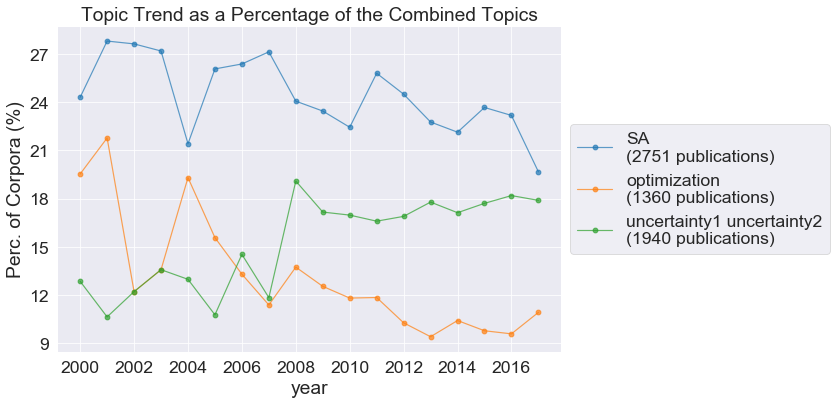

In [91]:
wos_plot.plot_topic_trend([SA_rc, optimization_rc, UA_rc], total_rc=RC, title='Topic Trend as a Percentage of the Combined Topics', save_plot_fn='figs/Topic Trend Percentage')

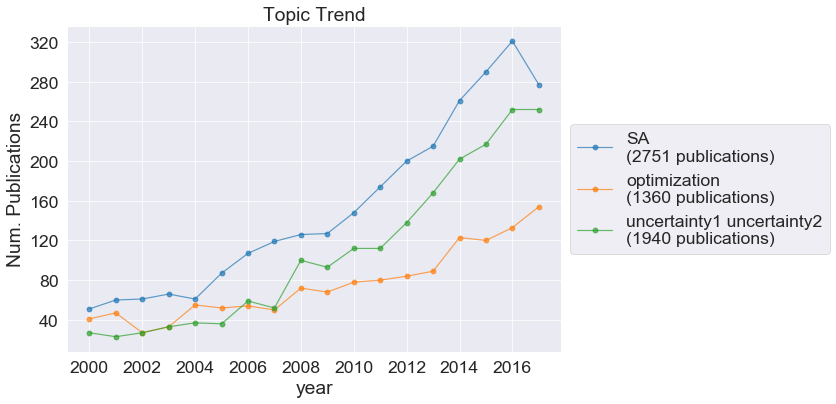

In [92]:
wos_plot.plot_topic_trend([SA_rc, optimization_rc, UA_rc], title='Topic Trend', save_plot_fn='figs/Topic Trend')

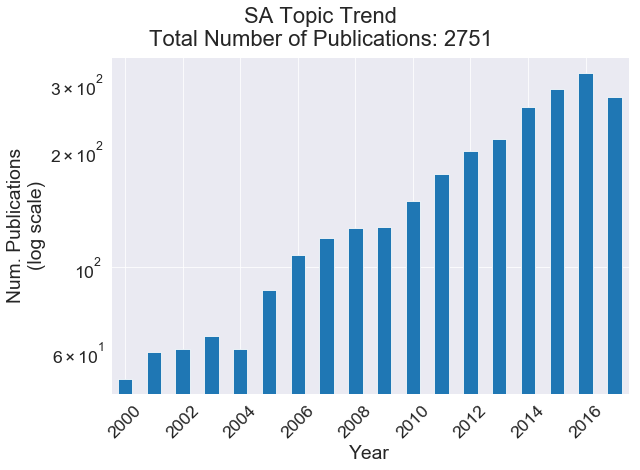

In [28]:
wos_plot.plot_pub_trend(SA_rc, title='SA Topic Trend', save_plot_fn='figs/sa_trend_2000-2016.png')

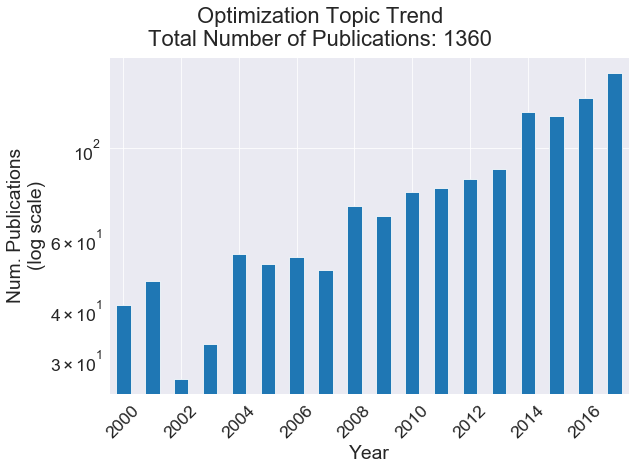

In [29]:
wos_plot.plot_pub_trend(optimization_rc, title='Optimization Topic Trend', save_plot_fn='figs/opti_trend_2000-2016.png')

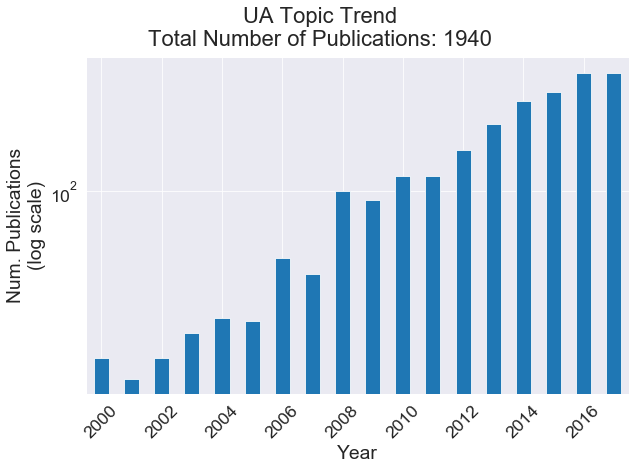

In [30]:
wos_plot.plot_pub_trend(UA_rc, title='UA Topic Trend', save_plot_fn='figs/ua_trend_2000-2016.png')

<hr>
Identifying papers relevant to frameworks and applications of UA/SA from the UA, SA, optimization topics.

In [31]:
ua_sa_papers = reduce(lambda x, y: x + y, [SA_rc, optimization_rc, UA_rc])

In [32]:
wosis.rc_to_df(ua_sa_papers).to_csv('../data/ua_sa_papers.csv')

1. Frameworks and guidelines for UA/SA

In [33]:
frameworks = wosis.keyword_matches(ua_sa_papers, ['framework', 'guideline', 'comparison', 'evalua', 'review', 'critici', 'overview', 'diagnostic'], threshold=95.0)

In [34]:
all_frameworks = frameworks.combine_recs()

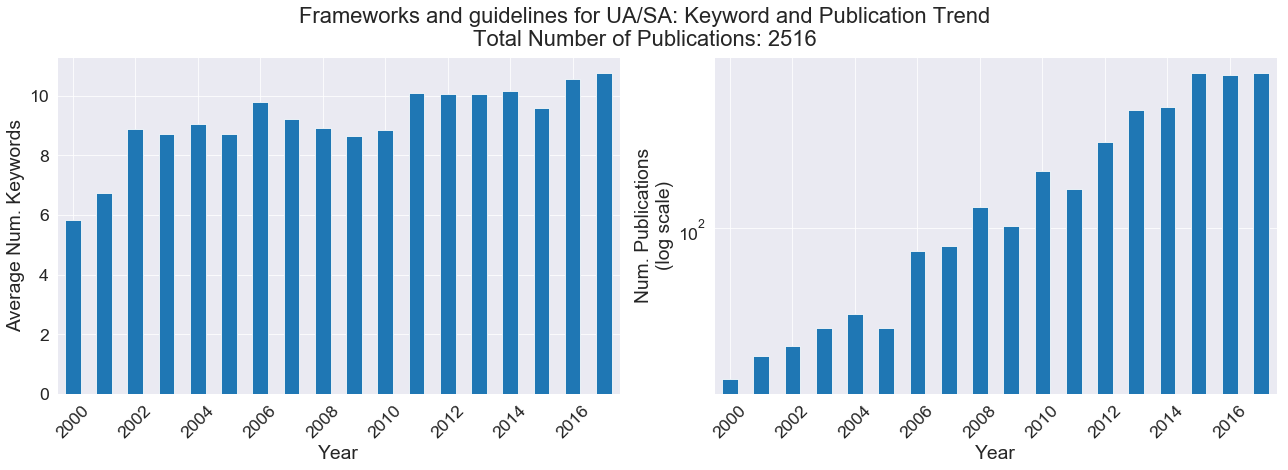

In [35]:
wos_plot.plot_kw_trend(all_frameworks, title='Frameworks and guidelines for UA/SA: Keyword and Publication Trend', save_plot_fn='figs/frameworks_pub_trend.png')

Removing Frameworks papers from the 'new collection'

In [36]:
wo_frameworks = mk.RecordCollection(name='without_frameworks')
for record in ua_sa_papers:
    if not all_frameworks.containsID(record.id):
        wo_frameworks.add(record)

2. Applications of UA/SA

In [37]:
applications = wosis.keyword_matches(wo_frameworks, ['appl', 'watershed', 'quantify', 'perform', 'calculate', 'in this study', 'catchment'], threshold=95.0)

In [38]:
all_applications = applications.combine_recs()

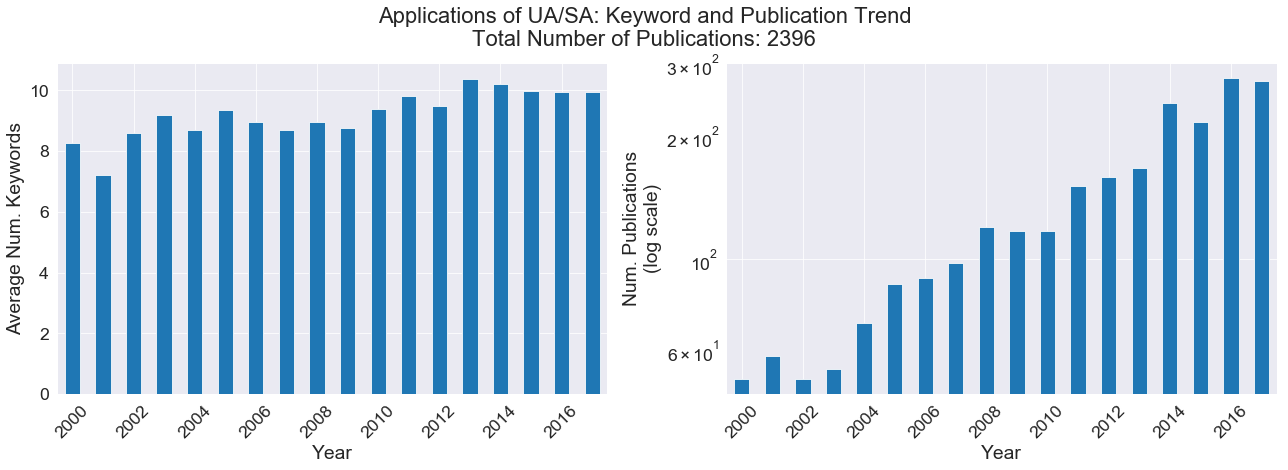

In [39]:
wos_plot.plot_kw_trend(all_applications, title='Applications of UA/SA: Keyword and Publication Trend', save_plot_fn='figs/app_pub_trend.png')

Trends

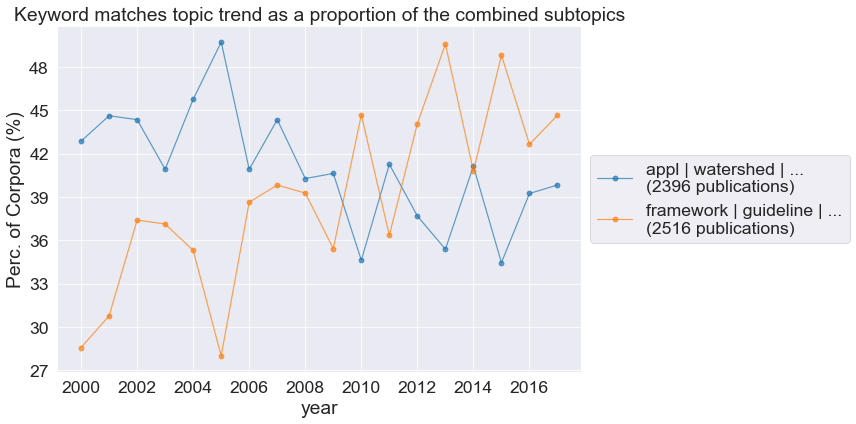

In [40]:
wos_plot.plot_topic_trend([applications, frameworks], total_rc=ua_sa_papers, title='Keyword matches topic trend as a proportion of the combined subtopics', save_plot_fn='figs/combined_topics_keyword_trend_percentage.png')

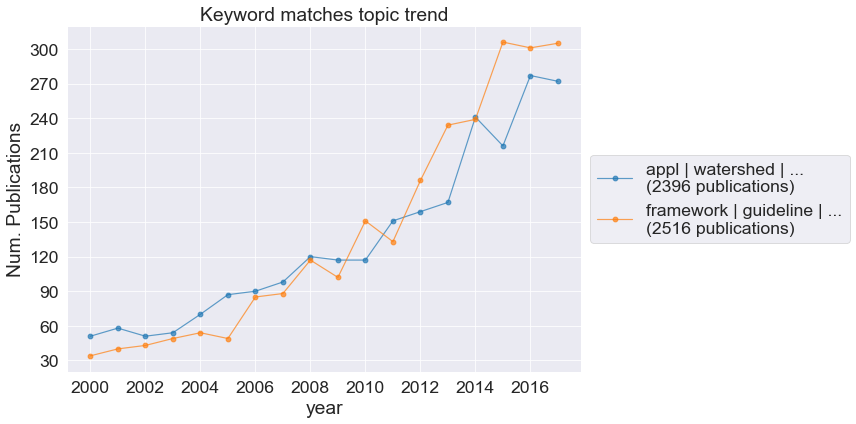

In [41]:
wos_plot.plot_topic_trend([applications, frameworks], title='Keyword matches topic trend', save_plot_fn='figs/combined_topics_keyword_trend.png')

Top cited journals
<br> 1. Frameworks

In [42]:
wos_config = wosis.load_config('config.yml')

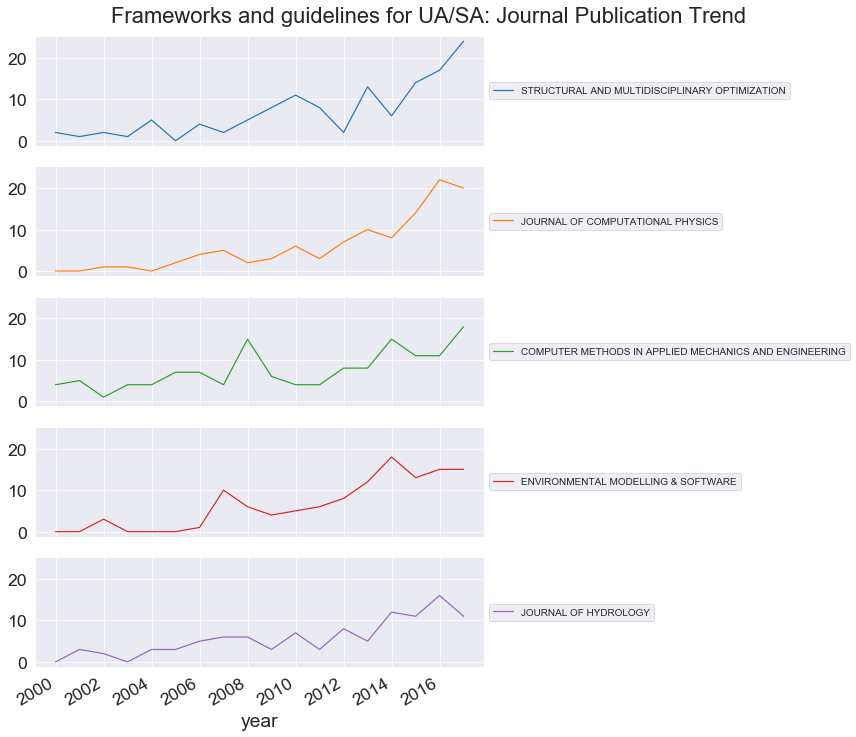

In [43]:
wos_plot.plot_journal_pub_trend(all_frameworks, top_n=5, save_plot_fn='figs/frameworks_journal_pub_trend.png', title='Frameworks and guidelines for UA/SA: Journal Publication Trend')

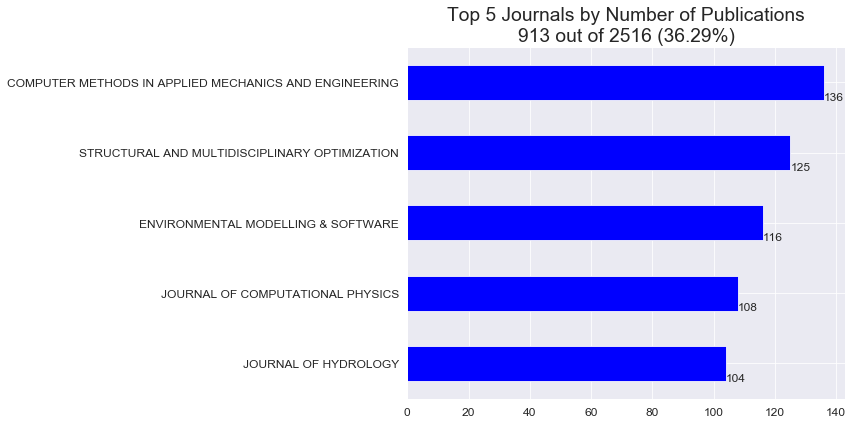

In [44]:
wos_plot.plot_pubs_per_journal(all_frameworks, top_n=5, annotate=True, show_stats=True, save_plot_fn='figs/frameworks_journal_pubs.png')

In [45]:
journals_of_interest_frameworks = ['Environmental Modelling & Software'.upper(), 'Journal of Hydrology'.upper(), 'Journal of Computational Physics'.upper(), 'Structural and Multidisciplinary Optimization'.upper(), 'Computer Methods in Applied Mechanics and Engineering'.upper()]
pubs_for_journals_frameworks = wosis.find_pubs_by_journal(all_frameworks, journals_of_interest_frameworks)

In [46]:
data_dir = "tmp"  # Using the temporary data directory 
                    #- should this be a different tmp?

# Get citations for each paper
paper_citations_per_journal_frameworks = {}
for pubs in pubs_for_journals_frameworks:
    paper_citations_per_journal_frameworks[pubs] = wosis.get_num_citations(pubs_for_journals_frameworks[pubs], wos_config, 
                                                                    cache_dir=data_dir)

Authenticated (SID: 6A6rHUnXjVnsMIJ8J5j)



Authenticated (SID: 8DvPgSYlpRSuEHMGSQ9)



Authenticated (SID: 7BY3NhobHmRK1cwdT9S)



Authenticated (SID: 5DCSGWwysA2oCtqozq4)



Authenticated (SID: 8E6vhjzQHWGQbb4be2R)


In [47]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_frameworks = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_frameworks.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_frameworks = collection_frameworks.append(df[cols_of_interest][0:10], ignore_index=True)

In [48]:
top_cited_in_top_journals_frameworks = collection_frameworks.sort_values('citations', ascending=False)
top_cited_in_top_journals_frameworks.head(10)

,AU,year,title,journal,citations,DOI link
10,"Bennett, ND|Croke, BFW|Guariso, G|Guillaume, J...",2013,Characterising performance of environmental mo...,ENVIRONMENTAL MODELLING & SOFTWARE,581,https://dx.doi.org/10.1016/j.envsoft.2012.09.011
11,"Refsgaard, JC|van der Sluijs, JP|Hojberg, AL|V...",2007,Uncertainty in the environmental modelling pro...,ENVIRONMENTAL MODELLING & SOFTWARE,510,https://dx.doi.org/10.1016/j.envsoft.2007.02.004
40,"Sigmund, O|Maute, K",2013,Topology optimization approaches A comparative...,STRUCTURAL AND MULTIDISCIPLINARY OPTIMIZATION,384,https://dx.doi.org/10.1007/s00158-013-0978-6
20,"Yang, J|Reichert, P|Abbaspour, KC|Xia, J|Yang, H",2008,Comparing uncertainty analysis techniques for ...,JOURNAL OF HYDROLOGY,312,https://dx.doi.org/10.1016/j.jhydrol.2008.05.012
0,"Blatman, G|Sudret, B",2011,Adaptive sparse polynomial chaos expansion bas...,JOURNAL OF COMPUTATIONAL PHYSICS,253,https://dx.doi.org/10.1016/j.jcp.2010.12.021
30,"Moens, D|Vandepitte, D",2005,A survey of non-probabilistic uncertainty trea...,COMPUTER METHODS IN APPLIED MECHANICS AND ENGI...,237,https://dx.doi.org/10.1016/j.cma.2004.03.019
41,"van Dijk, NP|Maute, K|Langelaar, M|van Keulen, F",2013,Level-set methods for structural topology opti...,STRUCTURAL AND MULTIDISCIPLINARY OPTIMIZATION,201,https://dx.doi.org/10.1007/s00158-013-0912-y
42,"Shan, SQ|Wang, GG",2010,Survey of modeling and optimization strategies...,STRUCTURAL AND MULTIDISCIPLINARY OPTIMIZATION,193,https://dx.doi.org/10.1007/s00158-009-0420-2
21,"Kuczera, G|Kavetski, D|Franks, S|Thyer, M",2006,Towards a Bayesian total error analysis of con...,JOURNAL OF HYDROLOGY,183,https://dx.doi.org/10.1016/j.jhydrol.2006.05.010
12,"Chen, Y|Yu, J|Khan, S",2010,Spatial sensitivity analysis of multi-criteria...,ENVIRONMENTAL MODELLING & SOFTWARE,169,https://dx.doi.org/10.1016/j.envsoft.2010.06.001


In [49]:
top_cited_in_top_journals_frameworks.to_csv('../data/top_cited_in_top_journals_frameworks.csv', index=False)

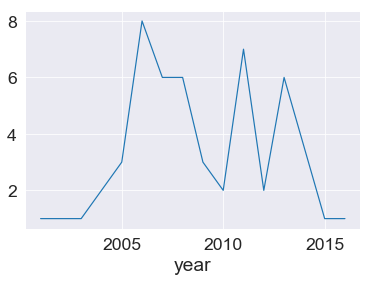

In [50]:
top_cited_in_top_journals_frameworks.groupby('year').count()['AU'].plot()

2. Applications

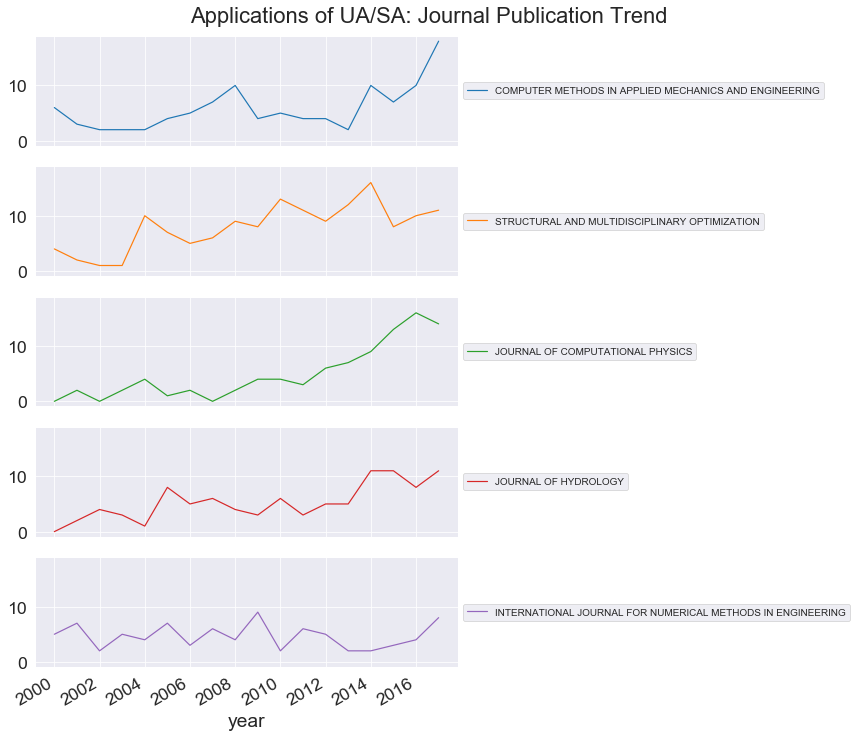

In [55]:
wos_plot.plot_journal_pub_trend(all_applications, top_n=5, save_plot_fn='figs/applications_journal_pub_trend.png', title='Applications of UA/SA: Journal Publication Trend')

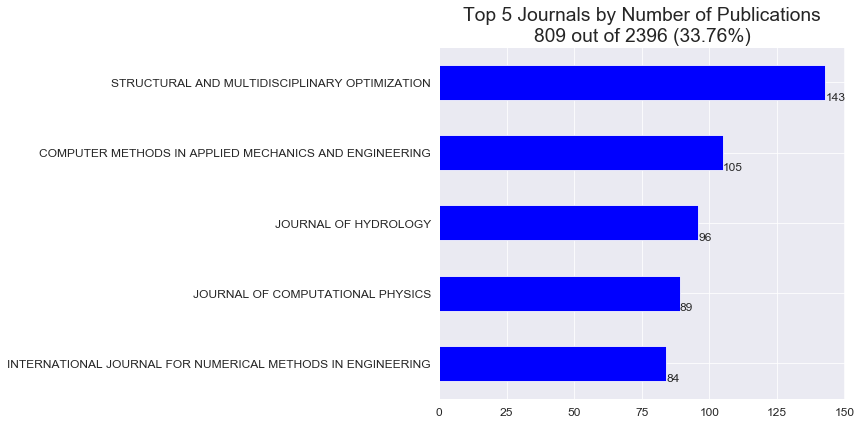

In [56]:
wos_plot.plot_pubs_per_journal(all_applications, top_n=5, annotate=True, show_stats=True, save_plot_fn='figs/app_journal_pubs.png')

In [57]:
journals_of_interest_app = ['Structural and Multidisciplinary Optimization'.upper(), 'Journal of Hydrology'.upper(), 'Computer Methods in Applied Mechanics and Engineering'.upper(), 'Journal of Computational Physics'.upper(), 'International Journal for Numerical Methods in Engineering'.upper()]
pubs_for_journals_app = wosis.find_pubs_by_journal(all_applications, journals_of_interest_app)

In [59]:
data_dir = "tmp"  # Using the temporary data directory

paper_citations_per_journal_app = {}
for pubs in pubs_for_journals_app:
    paper_citations_per_journal_app[pubs] = wosis.get_num_citations(pubs_for_journals_app[pubs], wos_config, 
                                                                    cache_dir=data_dir)

Authenticated (SID: 5CfDgrGtTdcRd3FStaC)


In [60]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_app = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_app.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_app = collection_app.append(df[cols_of_interest][0:10], ignore_index=True)

In [61]:
top_cited_in_top_journals_app = collection_app.sort_values('citations', ascending=False)
top_cited_in_top_journals_app.head(10)

,AU,year,title,journal,citations,DOI link
10,"Oudin, L|Hervieu, F|Michel, C|Perrin, C|Andrea...",2005,Which potential evapotranspiration input for a...,JOURNAL OF HYDROLOGY,322,https://dx.doi.org/10.1016/j.jhydrol.2004.08.026
11,"Muleta, MK|Nicklow, JW",2005,Sensitivity and uncertainty analysis coupled w...,JOURNAL OF HYDROLOGY,259,https://dx.doi.org/10.1016/j.jhydrol.2004.09.005
30,"Pedersen, CBW|Buhl, T|Sigmund, O",2001,Topology synthesis of large-displacement compl...,INTERNATIONAL JOURNAL FOR NUMERICAL METHODS IN...,235,https://dx.doi.org/10.1002/nme.148
0,"Le Maitre, OP|Knio, OM|Najm, HN|Ghanem, RG",2004,Uncertainty propagation using Wiener-Haar expa...,JOURNAL OF COMPUTATIONAL PHYSICS,208,https://dx.doi.org/10.1016/j.jcp.2003.11.033
12,"McVicar, TR|Van Niel, TG|Li, LT|Hutchinson, MF...",2007,Spatially distributing monthly reference evapo...,JOURNAL OF HYDROLOGY,202,https://dx.doi.org/10.1016/j.jhydrol.2007.02.018
13,"Pappenberger, F|Beven, K|Horritt, M|Blazkova, S",2005,Uncertainty in the calibration of effective ro...,JOURNAL OF HYDROLOGY,201,https://dx.doi.org/10.1016/j.jhydrol.2004.06.036
14,"Gong, LB|Xu, CY|Chen, DL|Halldin, S|Chen, YQD",2006,Sensitivity of the Penman-Monteith reference e...,JOURNAL OF HYDROLOGY,196,https://dx.doi.org/10.1016/j.jhydrol.2006.03.027
1,"Le Maitre, OP|Najm, HN|Ghanem, RG|Knio, OM",2004,Multi-resolution analysis of Wiener-type uncer...,JOURNAL OF COMPUTATIONAL PHYSICS,177,https://dx.doi.org/10.1016/j.jcp.2003.12.020
2,"Oberkampf, WL|Barone, MF",2006,Measures of agreement between computation and ...,JOURNAL OF COMPUTATIONAL PHYSICS,175,https://dx.doi.org/10.1016/j.jcp.2006.03.037
31,"Stegmann, J|Lund, E",2005,Discrete material optimization of general comp...,INTERNATIONAL JOURNAL FOR NUMERICAL METHODS IN...,167,https://dx.doi.org/10.1002/nme.1259


In [62]:
top_cited_in_top_journals_app.to_csv('../data/top_cited_in_top_journals_app.csv', index=False)

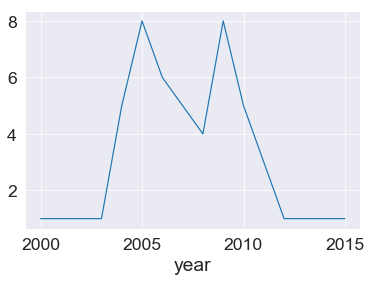

In [63]:
top_cited_in_top_journals_app.groupby('year').count()['AU'].plot()

In [64]:
top_cited_in_top_journals_app.loc[top_cited_in_top_journals_app['year'] == 2005, 'title'].tolist()

['Which potential evapotranspiration input for a lumped rainfall-runoff model? Part 2 - Towards a simple and efficient potential evapotranspiration model for rainfall-runoff modelling',
 'Sensitivity and uncertainty analysis coupled with automatic calibration for a distributed watershed model',
 'Uncertainty in the calibration of effective roughness parameters in HEC-RAS using inundation and downstream level observations',
 'Discrete material optimization of general composite shell structures',
 'Topology optimization of channel flow problems',
 'Multi-objective robust optimization using a sensitivity region concept',
 'Sensitivity analyses of a distributed catchment model to verify the model structure',
 'Adaptive probability analysis using an enhanced hybrid mean value method']